In [37]:
#@title
%%html
<h1>Advanced Data Science House Price Prediction Assessment</h1>

# Installs and Imports

Need to perform a runtime restart after `osmnx`, so install `osmnx` first

In [32]:
%pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
%pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install ipython-sql
%pip install PyMySQL
%load_ext sql

In [16]:
%pip uninstall --yes fynesse
%pip install git+https://github.com/F-Br/data-science-framework.git

Found existing installation: fynesse 0.1.0
Uninstalling fynesse-0.1.0:
  Successfully uninstalled fynesse-0.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/F-Br/data-science-framework.git to /tmp/pip-req-build-mjeycxau
  Running command git clone -q https://github.com/F-Br/data-science-framework.git /tmp/pip-req-build-mjeycxau
  Created wheel for fynesse: filename=fynesse-0.1.0-py3-none-any.whl size=17965 sha256=84e5efdf0984f0f7f9f293496d685ade748b3aa59b55b4f22a2112b3bc973249
  Stored in directory: /tmp/pip-ephem-wheel-cache-9hbod_1y/wheels/a7/f7/fe/ef5f209fffa24a007e9164435dcc03e83518f5653f7141db0b
Successfully built fynesse


In [1]:
import fynesse

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


interactive(children=(Text(value='', description='Username:'), Password(description='Password:'), Button(descr…

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# Initial Data Exploration and Sanity Checking

The database setup, downloading data, and uploading data has already been done as would be superfluous to cover in this notebook. If you would like to look at the database setup then the functions for it are present in the `access.py` file.



## Sanity Checks and Data Cleaning

Firstly, I would like to explore what the SQL tables downloaded look like to get a feel for any data cleaning or sanity checks I should perform. Doing so early will hopefully avoid any bugs being caused by unclean data. These would be harder to debug and so it makes sense to consider them early.

In [3]:
pd.DataFrame(fynesse.access.fetch_table_head("pp_data", 100))

0       1           2         3  4   \
0   {25EA59FA-4331-4D50-E050-A8C0630562D0}  130000  2015-10-23  NE29 0RX  T   
1   {25EA59FA-4332-4D50-E050-A8C0630562D0}   97500  2015-11-03   SR4 0AX  T   
2   {25EA59FA-4333-4D50-E050-A8C0630562D0}   95000  2015-10-30   NE2 4DE  F   
3   {25EA59FA-4334-4D50-E050-A8C0630562D0}  115000  2015-10-12  NE40 3HA  T   
4   {25EA59FA-4335-4D50-E050-A8C0630562D0}   85000  2015-10-20   SR4 0ES  S   
..                                     ...     ...         ...       ... ..   
95  {25EA59FA-49A1-4D50-E050-A8C0630562D0}   59950  2015-10-07  NP10 9FW  F   
96  {25EA59FA-49A2-4D50-E050-A8C0630562D0}  115000  2015-10-16  LL11 2HY  S   
97  {25EA59FA-49A3-4D50-E050-A8C0630562D0}  159000  2015-11-13  LL28 4LB  S   
98  {25EA59FA-49A4-4D50-E050-A8C0630562D0}   55000  2015-07-27   CF5 5HN  F   
99  {25EA59FA-49A5-4D50-E050-A8C0630562D0}  100000  2015-10-30  SY15 6SH  T   

   5  6    7           8                 9            10                   11  \
0   N  F   77  Unnamed: 8      TUDOR AVENUE  Unnamed: 10        NORTH SHIELDS   
1   N  F   13                  FORDHAM ROAD                        SUNDERLAND   
2   N  L  10A               VICTORIA SQUARE               NEWCASTLE UPON TYNE   
3   N  L   41              SILVERMERE DRIVE                             RYTON   
4   N  F   17                  PRESCOT ROAD                        SUNDERLAND   
.. .. ..  ...         ...               ...          ...                  ...   
95  N  L   32                 UPLANDS COURT   ROGERSTONE              NEWPORT   
96  N  F    7                   WEST STREET                           WREXHAM   
97  N  F  144                PENRHYN AVENUE  RHOS ON SEA           COLWYN BAY   
98  N  L  141                   CAERAU LANE                           CARDIFF   
99  N  F   23                  VERLON CLOSE                        MONTGOMERY   

                     12             13 14  15   16  
0        NORTH TYNESIDE  TYNE AND WEAR  A  A.    1  
1            SUNDERLAND  TYNE AND WEAR  A   A    2  
2   NEWCASTLE UPON TYNE  TYNE AND WEAR  A   A    3  
3             GATESHEAD  TYNE AND WEAR  A   A    4  
4            SUNDERLAND  TYNE AND WEAR  A   A    5  
..                  ...            ... ..  ..  ...  
95              NEWPORT        NEWPORT  A   A   96  
96              WREXHAM        WREXHAM  A   A   97  
97                CONWY          CONWY  A   A   98  
98              CARDIFF        CARDIFF  A   A   99  
99                POWYS          POWYS  A   A  100  

[100 rows x 17 columns]

In [42]:
pd.DataFrame(fynesse.access.fetch_table_head("postcode_data", 100))

0           1      2       3       4   5         6            7   \
0   AB1 0AA  terminated  small  385386  801193   1  Scotland  57.10147400   
1   AB1 0AB  terminated  small  385177  801314   1  Scotland  57.10255400   
2   AB1 0AD  terminated  small  385053  801092   1  Scotland  57.10055600   
3   AB1 0AE  terminated  small  384600  799300   8  Scotland  57.08444400   
4   AB1 0AF  terminated  large  384460  800660   8  Scotland  57.09665600   
..      ...         ...    ...     ...     ...  ..       ...          ...   
95  AB1 0LD  terminated  small  383624  801298   1  Scotland  57.10235800   
96  AB1 0LE  terminated  small  383543  800383   1  Scotland  57.09413500   
97  AB1 0LJ  terminated  small  384141  800394   1  Scotland  57.09425500   
98  AB1 0LL  terminated  small  383814  800304   1  Scotland  57.09343500   
99  AB1 0LN  terminated  small  383823  799730   1  Scotland  57.08828000   

             8       9        10        11  12   13     14   15   16   17  
0   -2.24285100  AB10AA  AB1 0AA  AB1  0AA  AB  AB1  AB1 0  AB1  0AA    1  
1   -2.24630800  AB10AB  AB1 0AB  AB1  0AB  AB  AB1  AB1 0  AB1  0AB    2  
2   -2.24834200  AB10AD  AB1 0AD  AB1  0AD  AB  AB1  AB1 0  AB1  0AD    3  
3   -2.25570800  AB10AE  AB1 0AE  AB1  0AE  AB  AB1  AB1 0  AB1  0AE    4  
4   -2.25810200  AB10AF  AB1 0AF  AB1  0AF  AB  AB1  AB1 0  AB1  0AF    5  
..          ...     ...      ...       ...  ..  ...    ...  ...  ...  ...  
95  -2.27194100  AB10LD  AB1 0LD  AB1  0LD  AB  AB1  AB1 0  AB1  0LD   96  
96  -2.27321800  AB10LE  AB1 0LE  AB1  0LE  AB  AB1  AB1 0  AB1  0LE   97  
97  -2.26335000  AB10LJ  AB1 0LJ  AB1  0LJ  AB  AB1  AB1 0  AB1  0LJ   98  
98  -2.26874000  AB10LL  AB1 0LL  AB1  0LL  AB  AB1  AB1 0  AB1  0LL   99  
99  -2.26855500  AB10LN  AB1 0LN  AB1  0LN  AB  AB1  AB1 0  AB1  0LN  100  

[100 rows x 18 columns]

Reading through the documentation for these databases helps to clarify what to expect from each column.

*   For the Price Paid Datasets: https://www.gov.uk/guidance/about-the-price-paid-data#Explanations-of-column-headers-in-the-PPD

*   For the postcode Dataset ("Fields" header): https://www.getthedata.com/open-postcode-geo




My thoughts from going through these are to check the following:


*   Missing postcode values
*   Missing lattitude and/or longitude values
*   Missing property type
*   Approximate country distribution
*   Approximate property type distribution
*   Leasing distribution


In [9]:
print(f"pp_data row count: {fynesse.access.table_row_count('pp_data')}") # 6032974
print(f"postcode_data row count: {fynesse.access.table_row_count('postcode_data')}") # 2610679

pp_data row count: ((6032974,),)
postcode_data row count: ((2610679,),)


In [17]:
print(fynesse.access.check_column_for_value("pp_data", "postcode", "")) # 25343
print(fynesse.access.check_column_for_value("postcode_data", "postcode", "")) # 0

((25343,),)
((0,),)


In [16]:
print(fynesse.access.check_column_for_value("postcode_data", "lattitude", "")) # 20848
print(fynesse.access.check_column_for_value("postcode_data", "longitude", "")) # 20850
print(fynesse.access.check_column_for_null("postcode_data", "lattitude")) # 0
print(fynesse.access.check_column_for_null("postcode_data", "longitude")) # 0
print(fynesse.access.check_for_no_longitude_and_lattitude()) # 20848

((20848,),)
((20850,),)
((0,),)
((0,),)
((20848,),)


In [14]:
print(fynesse.access.check_column_for_value("pp_data", "property_type", "")) # 0
print(fynesse.access.check_column_for_null("pp_data", "property_type")) # 0

((0,),)
((0,),)


These checks cover the first 3 points in the list.

Although there are some missing values, the worst loss of information is from the lattitude and longitude which only comes out to at worst 0.1% of the data available. Therefore, I don't mind ignoring these values. You could potentially reconstruct these values from the town_city column but I am not going to due to time constraints.

One potential bias to keep in mind from this would be which qualities of a property make it more likely to have missing values. If there is a correlation say between expensive properties and missing values then you may be removing these from the dataset. For the purpose of this, I will make an assumption that it is done to data recording error and so closely matches a uniform probability of record loss across all properties.

## Location and Property Type Exploration

To answer the other sanity checking questions and to also get more of an understanding of the data, I will plot prices across the map of the UK and I will also plot the distribution of property types.

joined data fetched


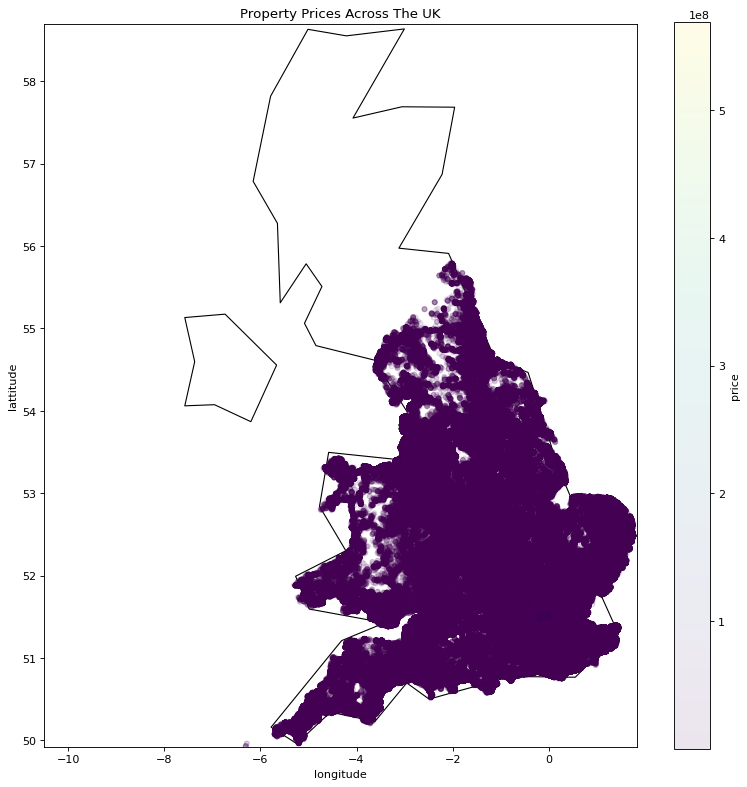

In [5]:
UK_max_lattitude = 58.696977
UK_min_lattitude = 49.921544
UK_max_longitude = 1.830806
UK_min_longitude = -10.493171
UK_lattitude_mean = (UK_max_lattitude + UK_min_lattitude)/2
UK_lattitude_range = abs(UK_max_lattitude - UK_min_lattitude)
UK_longitude_mean = (UK_max_longitude + UK_min_longitude)/2
UK_longitude_range = abs(UK_max_longitude - UK_min_longitude)

price_df = fynesse.access.fetch_pp_and_pc_joined_area(UK_lattitude_mean, UK_longitude_mean, date=datetime.date(2019, 1, 1), lat_height=UK_lattitude_range, long_width=UK_longitude_range, days_since=365)
fynesse.assess.plot_UK_price_map(price_df=price_df)

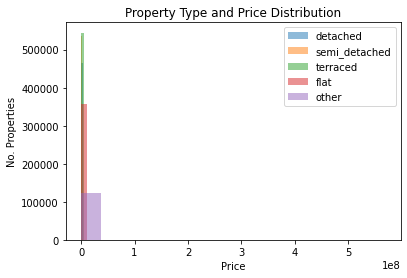

In [6]:
fynesse.assess.plot_type_distribution(price_df)

From the UK plot it is evident that there exist outliers in the data. The property type distribution plot suggests that the outliers make up a very small proportion of the properties and so I can still represent the distribution of property prices accurately if I remove these outliers. To do this I will remove the 2.5% heighest and lowest sold properties for the region.

The plot also shows us that most of the data is from England or Wales, with the majority of the data out of those two being from England.

In [7]:
price_df = fynesse.assess.remove_price_tails(price_df, 0.025)

lower bound: 55000.0 
upper bound: 1035000.0


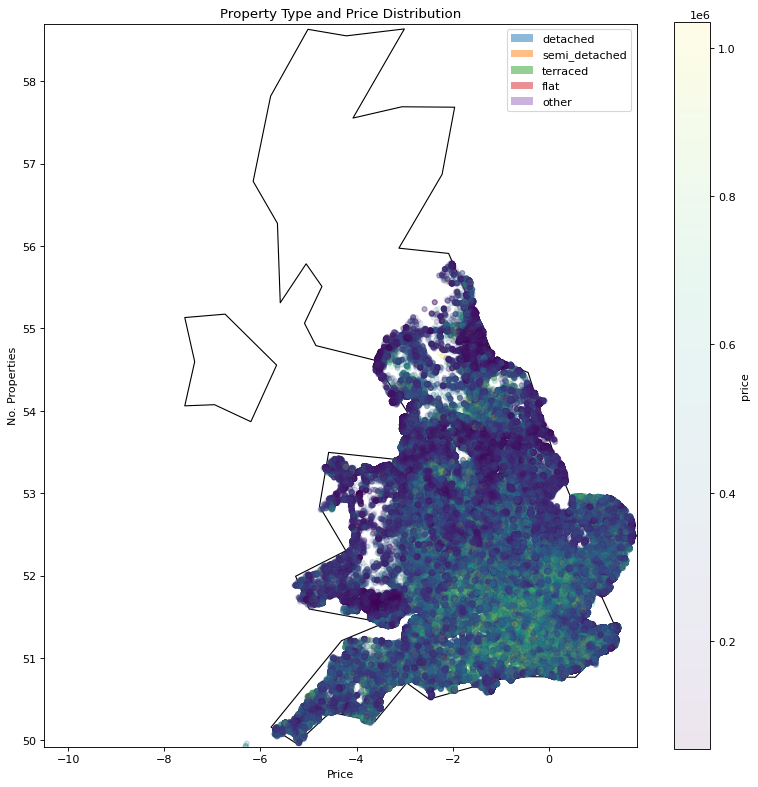

In [8]:
fynesse.assess.plot_UK_price_map(price_df=price_df, days_since=600)

From the map we can see that prices around london are higher and that there exist clusters where price is higher or lower than their surroundings. Visually, there is no obvious equation which would give a good average price of an area. Therefore, I will plot the rolling average of prices with respect to the lattitude and longitude to see if there exists some relationship.

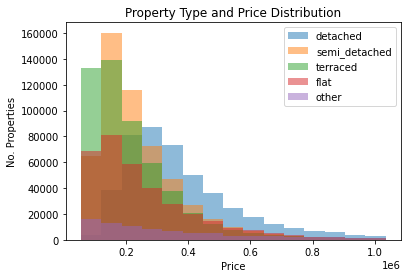

In [9]:
fynesse.assess.plot_type_distribution(price_df)

From the improved type distribution plot, we can tell that the typical order of price seems to be (from high to low): 

1.   detached
2.   semi-detached
3.   flat (as more weight on RHS compared to terraced)
4.   terraced


Additionally, we can see that "Other" makes up a small amount of the data, but is distributed more uniformly than the alternative types. In fact, it might be wise to issue a warning in the prediction that the price of "Other" can vary more greatly than the alternate types.

Moreover, its worth noting that these distriubtions look quite similar to poisson distributions. We could potentially use this observation to help with modelling, but would maybe need a more rigourous way to support this hypothesis.

The distributions are pronounced enough that it makes sense to split up training data for a model to only train on the type of property it is going to predict. 

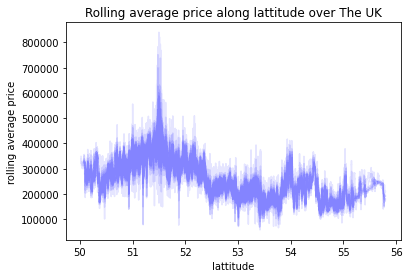

In [10]:
for i in range(6):
  fynesse.assess.plot_rolling_average(price_df, "lattitude", "price", window_size=(100*(i+1)))

plt.show()

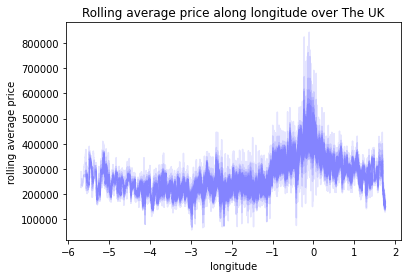

In [11]:
for i in range(6):
  fynesse.assess.plot_rolling_average(price_df, "longitude", "price", window_size=(100*(i+1)))

plt.show()

*Faint blue parts of plot indicate the variance of the price*

We can determine some interesting things from this plot. We can tell that house prices are higher in the south. Additionally, the 2 plots seems to show that London really does have typically the  highest house prices.  

However, the price seems to have too much variance to be modelled by simply lattitude and longitude alone. Therefore, it makes sense to use a local constant derived from fetching property prices around the targeted coordinates and use this as a feature.

In order to explore this further, I will have to start assessing the data in a more localised way. The risk in doing this is that the specific place I look at locally is not representative of the rest of the UK. Therefore, I will consider a set of randomly selected towns across the UK to test features. Another advantage of this is it allows for empirically selecting models based on validation dataset performance.

## Variety Local Data For Validation of Ideas

My process for this was to select towns randomly using a random number generator and a list of towns in England (https://en.wikipedia.org/wiki/List_of_towns_in_England). I have picked only English towns for 2 reasons:

Firstly, I know them better and so will have a better understanding of what and why properties should be priced as they are.

Secondly, as discussed earlier, most of the data is in England and so if I have a set of 5 places then it is most accurately representative of the data if most of them/all come from England.



In [8]:
date = datetime.date(2019, 1, 1)
box_width = 0.04
box_height = 0.04

In [13]:
town_tests = {"Barnsley": [53.5526, 1.4797], 
              "West Ham": [51.5380, 0.0125],
              "Ilfracombe": [51.2052, 4.1268], 
              "Millom": [54.2106, 3.2719], 
              "Ramsgate": [51.3355, 1.4199]}
town_dfs = fynesse.access.fetch_test_town_pp_data(town_tests, width=box_width, height=box_height, date=date)

joined data fetched
fetched Barnsley pricing data
joined data fetched
fetched West Ham pricing data
joined data fetched
fetched Ilfracombe pricing data
joined data fetched
fetched Millom pricing data
joined data fetched
fetched Ramsgate pricing data


In [14]:
for i in range(len(town_dfs)):
  town_dfs[i][0] = fynesse.assess.remove_price_tails(town_dfs[i][0], 0.025)

lower bound: nan 
upper bound: nan
lower bound: 89624.99999999999 
upper bound: 807224.9999999994
lower bound: nan 
upper bound: nan
lower bound: nan 
upper bound: nan
lower bound: 64100.0 
upper bound: 540000.0


Barnsley:


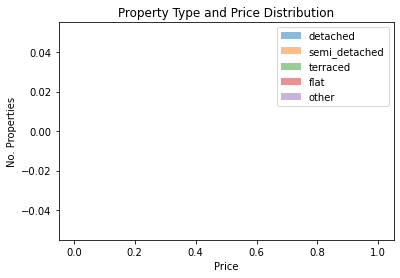

West Ham:


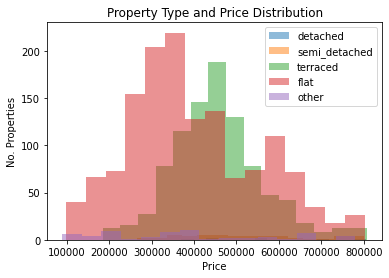

Ilfracombe:


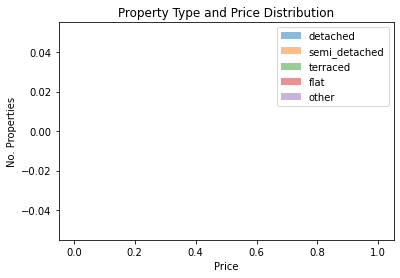

Millom:


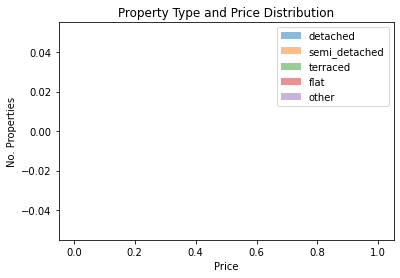

Ramsgate:


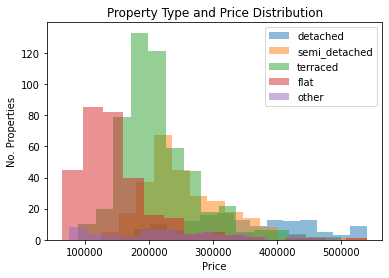

In [15]:
for location_price_data in town_dfs:
  price_df = location_price_data[0]
  town = location_price_data[1]
  print(f"{town}:")
  fynesse.assess.plot_type_distribution(price_df)

Here we see that there are not neccessarily going to be enough data points wherever the prediction coordinates are. Therefore, it will be important to issue a warning if there are not enough property prices nearby to make an accurate prediction.

I will need to generate 3 more towns in order to reach the test set of 5 towns I aimed for.

In [9]:
town_tests = {"West Ham": [51.5380, 0.0125],
              "Letchworth Garden City": [51.9791, 0.2266], 
              "Ramsgate": [51.3355, 1.4199],
              "Grimsby": [53.5674, -0.0976],
              "York": [53.9744, -1.0875]}
town_dfs = fynesse.access.fetch_test_town_pp_data(town_tests, width=box_width, height=box_height, date=date)

joined data fetched
fetched West Ham pricing data
joined data fetched
fetched Letchworth Garden City pricing data
joined data fetched
fetched Ramsgate pricing data
joined data fetched
fetched Grimsby pricing data
joined data fetched
fetched York pricing data


In [10]:
for i in range(len(town_dfs)):
  town_dfs[i][0] = fynesse.assess.remove_price_tails(town_dfs[i][0], 0.025)

lower bound: 89624.99999999999 
upper bound: 807224.9999999994
lower bound: 165223.625 
upper bound: 1694624.9999999998
lower bound: 64100.0 
upper bound: 540000.0
lower bound: 31500.0 
upper bound: 320625.0
lower bound: 115000.0 
upper bound: 1500900.0


West Ham:


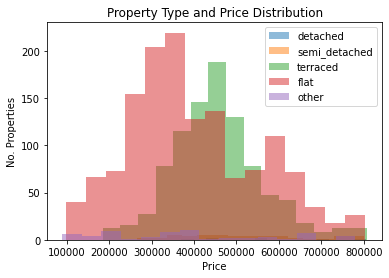

Letchworth Garden City:


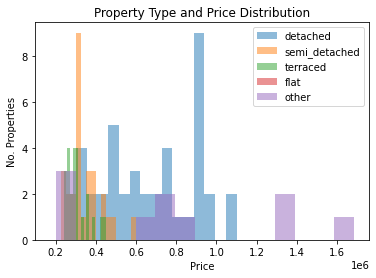

Ramsgate:


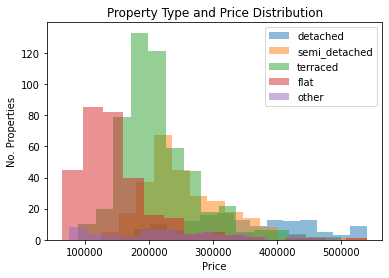

Grimsby:


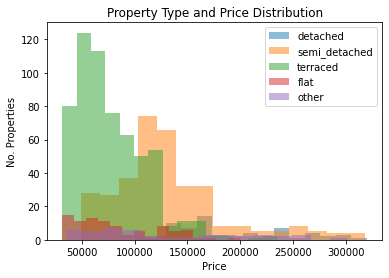

York:


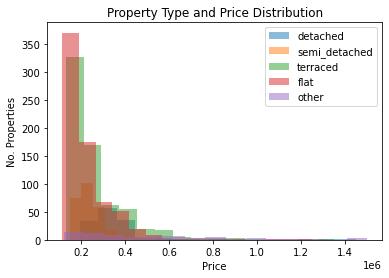

In [11]:
for location_price_data in town_dfs:
  price_df = location_price_data[0]
  town = location_price_data[1]
  print(f"{town}:")
  fynesse.assess.plot_type_distribution(price_df)

This is reassuring to see. All plots seem to have distinct distributions and so hopefully my model developed by tested its performance on these locations will generalise well.

## Additional Ideas

The concern I raised with the number of leased properties was that leases will be lower than the price of the property. The description for the dataset says that the only leases included are those longer than 7 years. This will go some way to mitigate the issue. One could potentially remove all leases, but then you would be removing a more significant proportion of your data. I have decided to leave them in out of risk of spreading my data too thin otherwise.


At this point, I could do a random split of the property locations I have such that 20% of the data is stored elsewhere as a holdout set which could be used to compare models.



# Feature Visualisation and Generation

## Feature Plotting

Some features which I could use for predicting house prices are local features which are present on Open Street Map (OSM). Looking online, I have found that there exists evidence for living near certain amenities resulting in increases to the property price. Some key factors affecting house price are discussed here:

https://www.housebeautiful.com/uk/lifestyle/property/a28633368/house-value-factors/

https://www.propertyroad.co.uk/what-affects-the-price-of-a-house/

I can't capture all of these features, however some of the following may be possible to express numerically using OSM data:


*   Local food and beverage amenities (positive)
*   Schools (positive)
*   fast food chains (negative)
*   Air and noise pollution (negative)
*   Increased traffic (negative)

Going on what I have read and my own experience/common sense, I have created a function which can identify OSM data points which represent features of a certain category. This function is the `fetch_tags(category)` in `access.py`. I have made lots of different categories to explore which are most correlated with property price.

One of the tools which was helpful for determining this is being able to visualise the data of house prices and the local features around them. This is possible by the local price and feature plots below.

I am collecting 2 types of features for each category. The number of features of that category within a feature box surrounding a property. The shortest distance from a feature of that category within the feature box, to the property in question. My training set will be constructed from a larger box covering all of the properties within an area. As I will need to calculate these features for each property in the property box, I will query from a larger outer bounding box (sort of like a cache) so that I am not continuously making calls to the OSM API.

A diagram of how my system works is below.

![](https://drive.google.com/uc?export=view&id=1mB7VbigWSG46LhAaN-PahCcvBK3VDVBz)

In [12]:
category_list = ["schooling", "children", "healthcare", "restaurants", "essential_shops", "exercise", "transport_utility"]

If you want to explore how different categories are locally distributed, or how good they are as features for predicting property prices (discussed later), then you can modify the `category_list` above to include or ignore categories and rerun the rest of the code to use a custom design matrix.

Please see https://wiki.openstreetmap.org/wiki/Map_features for a list of tags and what they correspond to.

West Ham:


/usr/local/lib/python3.8/dist-packages/fynesse/assess.py:100: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


Letchworth Garden City:


/usr/local/lib/python3.8/dist-packages/fynesse/assess.py:100: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


Ramsgate:


/usr/local/lib/python3.8/dist-packages/fynesse/assess.py:100: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


Grimsby:


/usr/local/lib/python3.8/dist-packages/fynesse/assess.py:100: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


York:


/usr/local/lib/python3.8/dist-packages/fynesse/assess.py:100: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


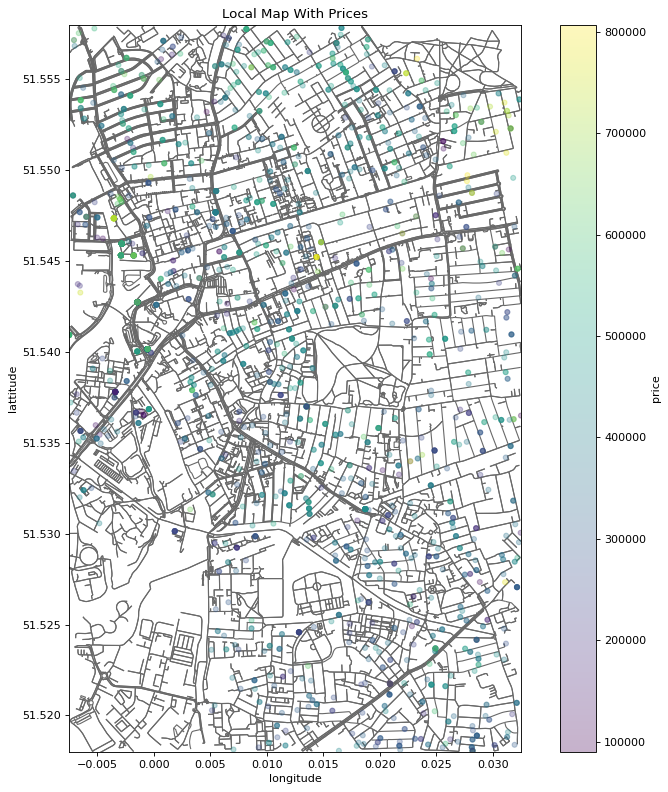

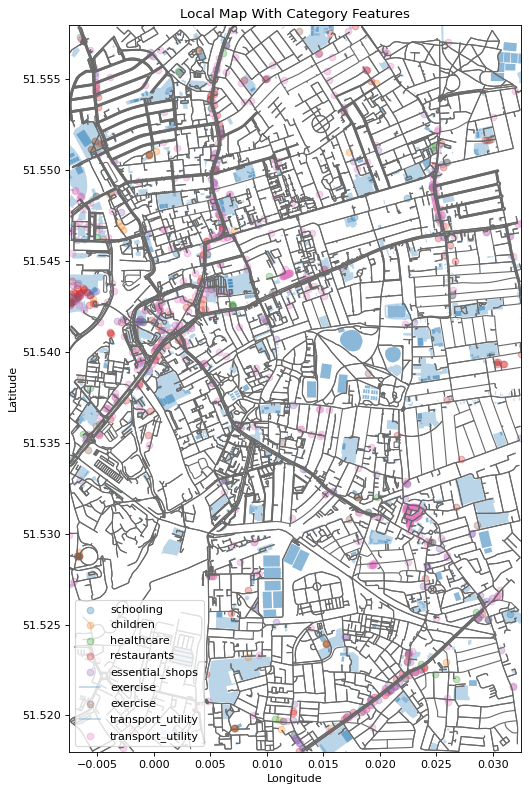

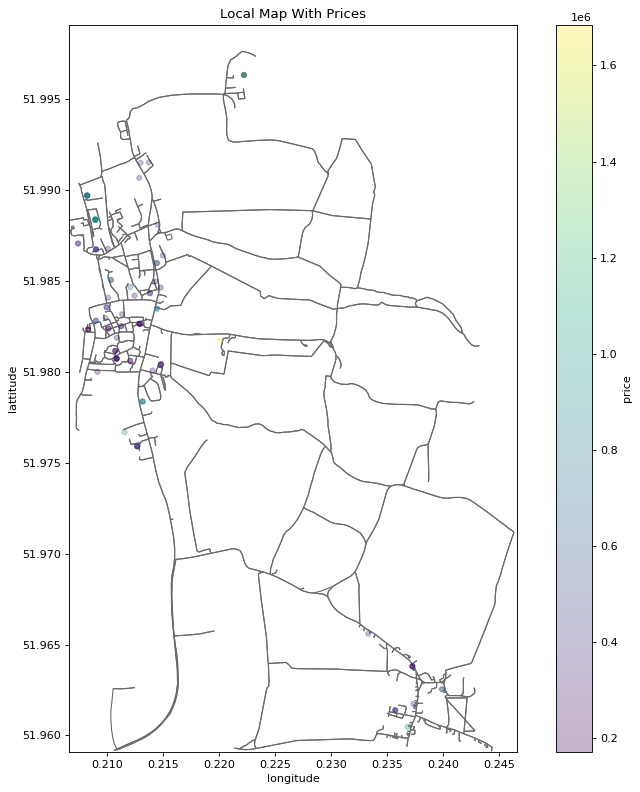

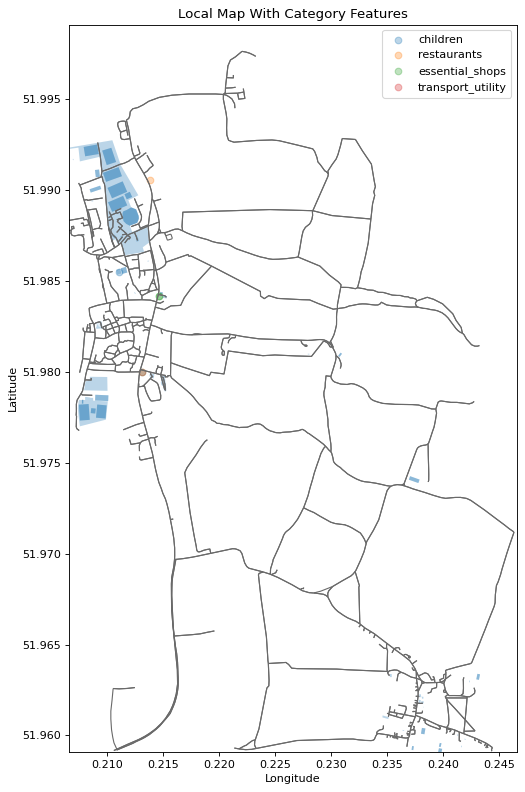

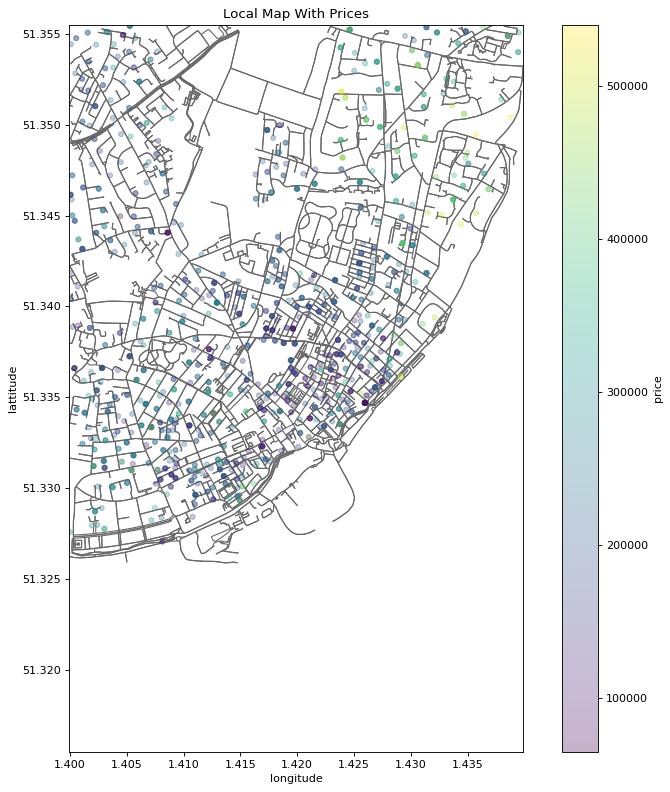

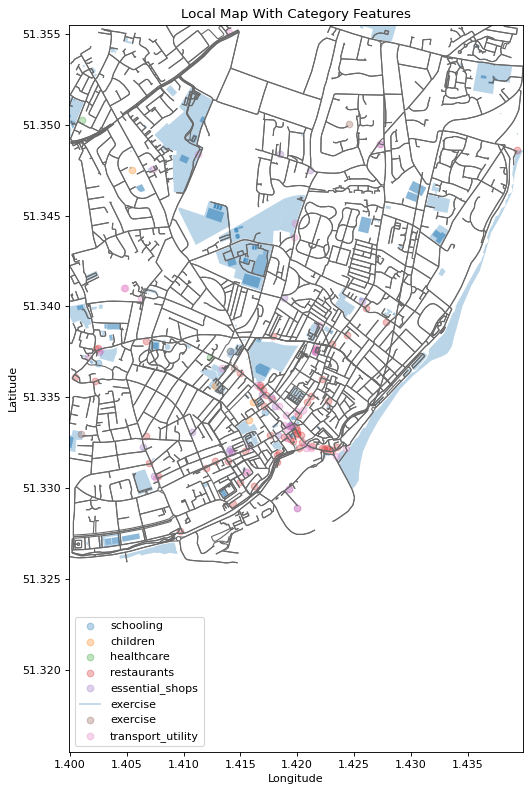

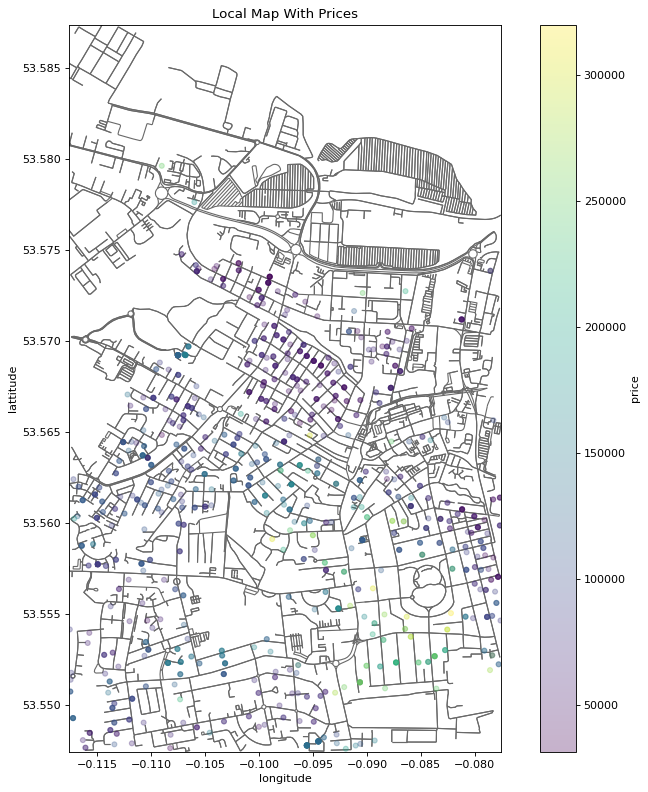

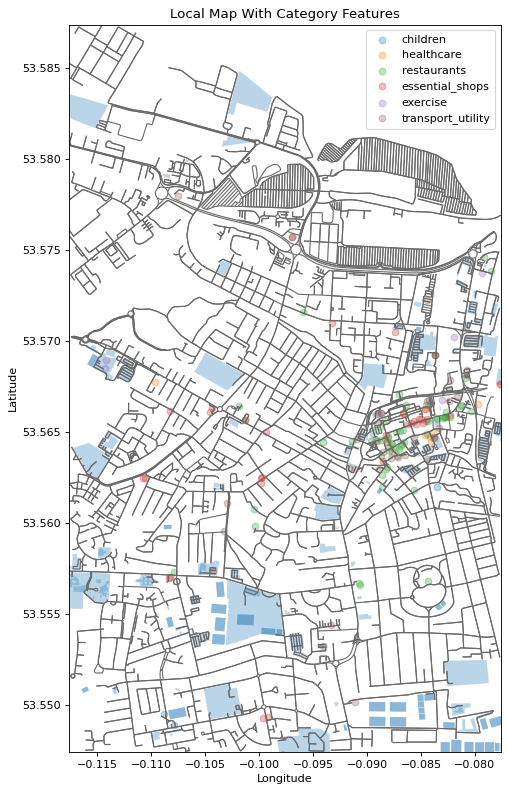

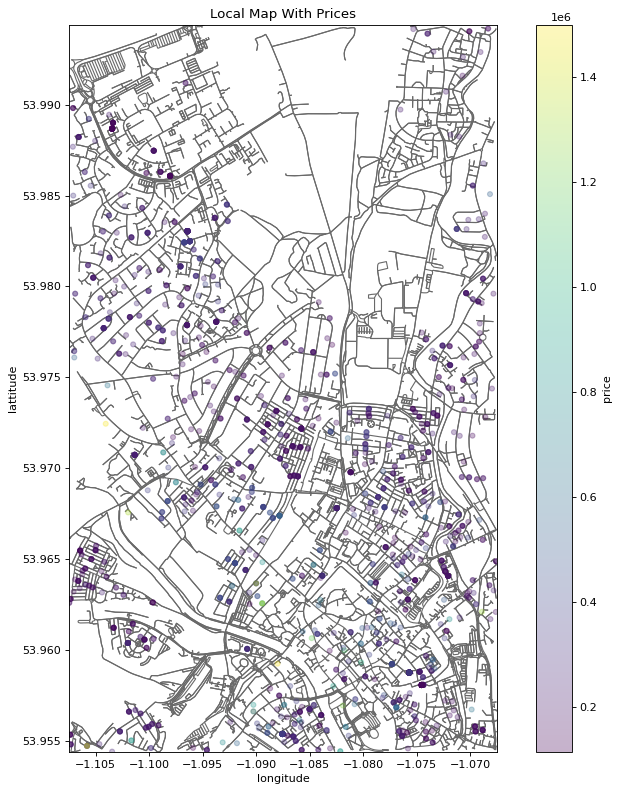

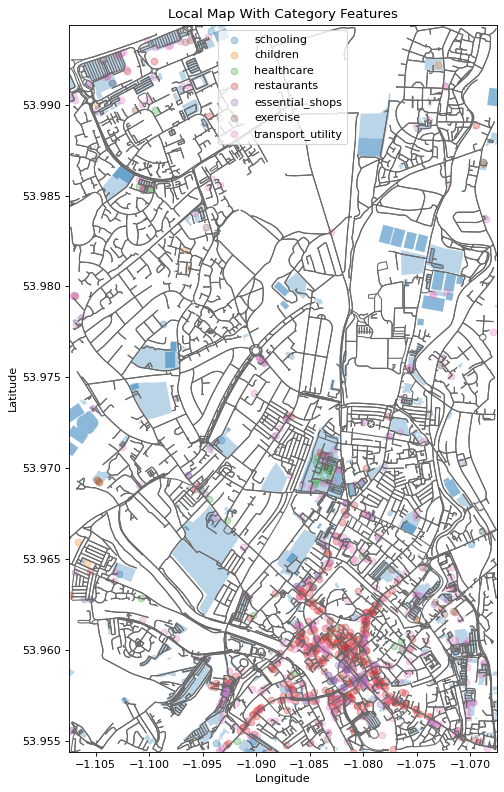

In [13]:
for location_price_data in town_dfs:
  price_df = location_price_data[0]
  town = location_price_data[1]
  town_lat = town_tests[town][0]
  town_long = town_tests[town][1]
  print(f"{town}:")
  fynesse.assess.plot_local_price_map(town, town_lat, town_long, box_width=box_width, box_height=box_height, price_df=price_df, date=date, days_since=365)
  fynesse.assess.plot_category_maps(category_list, town, town_lat, town_long, box_width=box_width, box_height=box_height)


These plots don't make it obvious which features are good or not, but they do show that there appear to also be local clusters where property prices are greater. You can sort of see that being close to schooling might be correlated. In order to see how features contribute to property price we could fit an OLS model and observe if the parameters are positive or negative. Additionally, we could test the validity of our results on the local town test datasets to see how well it performs.

## Possible Features

Some other features we could use are the property prices of nearby properties. We could construct some sort of weighting such that nearer houses contribute more to what the prediction is. This weighting doesn't just need to be a linear distance measure, we could experiement with different functions of distance. Ideally we would find some function which also is explainable/interpretable in some way.


Other features could include the mean or standard deviation of the distance of all the features of a category in the feature box. This might be a good feature as if you have a hub of shops quite far away, that means that you have lots of shopping options however you would also be far away enough to not have the traffic right outside your property. This case would have a low standard deviation but a high mean. You could experiment with a lot of these.


Finally, you could also use a non linear distance measurement for features of a category. For example, the shopping example earlier might match a right shifted quadratic where if it is very close it has a negative affect on price, but if is further away then it increases (of course this has problems, but the idea is hopefully clear).



# Modelling

## Potential Models

## Performance Warnings

There are several periods in time where the house prices would be drastically different - 2008 during the financial crisis, 2020/1 during COVID when people weren't allowed allowed to move house for a period of time and interest rates were very low.
If a prediction was made by a model which was fit on data that included prices from these periods, then a warning should be raised that the quality of the model may be not representative.


The OLS prediction model below includes a warning which flags the prediction with caution if there is not enough property price data within the bounding box.


There could potentially be another warning that the model quality is poor if there are very few features in the bounding box.

## Ordinary Least Squares

With the features I have discussed, I fit an OLS model and validated its performance on the local test town datasets. I also added in a constant feature of the value 1. This allows the OLS model to use a constant and so means that the other feature coefficients don't need to be as powerful in order to fit the model well.

In [15]:
# Example of prediction function
def prediction_ols(pred_lattitude, pred_longitude, property_type, date, category_list, days_since=365, property_box_length=0.08, feature_box_length=0.02, training_df=None, category_pois_dict=None, perform_prediction=True):
  ys, xs, training_df, category_pois_dict = fynesse.address.prepare_training_data(pred_lattitude, pred_longitude, property_type, date, category_list, days_since=days_since, property_box_length=property_box_length, feature_box_length=feature_box_length, training_df=training_df, category_pois_dict=category_pois_dict)
  fit_model = fynesse.address.fit_OLS_model(ys, xs, training_df)
  validation_df = training_df
  fynesse.address.validate_OLS_model(validation_df, fit_model)
  if perform_prediction:
    prediction_df = fynesse.address.fetch_prediction_data(pred_lattitude, pred_longitude, feature_box_length, feature_box_length, category_pois_dict, date, days_since)
    price_prediction = fynesse.address.predict_with_OLS_model(fit_model, prediction_df)
    return price_prediction, fit_model
  return fit_model


West Ham:


/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["lattitude"] = pois["geometry"].centroid.y #pois.apply(lambda feature: fetch_central_lattitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:583: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois["geometry"].centroid.x #pois.apply(lambda feature: fetch_central_longitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operati

fetched all features
joined data fetched
fetched pricing data
lower bound: 95869.6 
upper bound: 983999.9999999964


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))


fetched 2602 properties for this location, check this isnt too low, if it is: prediction = N.A.


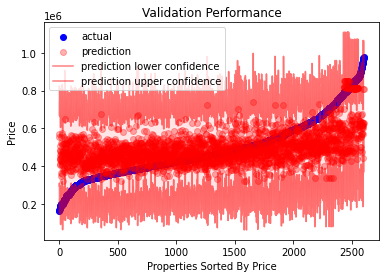

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     73.02
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          3.00e-175
Time:                        07:24:58   Log-Likelihood:                -34337.
No. Observations:                2602   AIC:                         6.870e+04
Df Residuals:                    2587   BIC:                         6.879e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.273e+05   1.69e+04     31.181      0.0

/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["lattitude"] = pois["geometry"].centroid.y #pois.apply(lambda feature: fetch_central_lattitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:583: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois["geometry"].centroid.x #pois.apply(lambda feature: fetch_central_longitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operati

fetched all features
joined data fetched
fetched pricing data
lower bound: 110125.0 
upper bound: 1296875.0


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))


fetched 91 properties for this location, check this isnt too low, if it is: prediction = N.A.


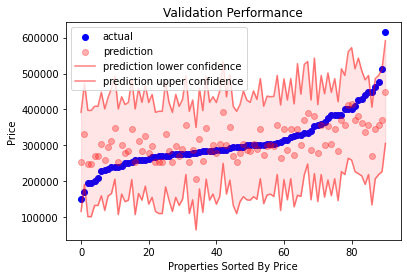

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     3.103
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           0.000757
Time:                        07:26:17   Log-Likelihood:                -1131.1
No. Observations:                  91   AIC:                             2292.
Df Residuals:                      76   BIC:                             2330.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.884e+05    7.6e+04      6.430      0.0

/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["lattitude"] = pois["geometry"].centroid.y #pois.apply(lambda feature: fetch_central_lattitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:583: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois["geometry"].centroid.x #pois.apply(lambda feature: fetch_central_longitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operati

fetched all features
joined data fetched
fetched pricing data
lower bound: 69760.0 
upper bound: 731499.9999999986


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))


fetched 742 properties for this location, check this isnt too low, if it is: prediction = N.A.


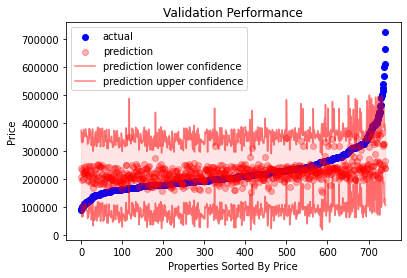

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     13.63
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           4.79e-29
Time:                        07:28:03   Log-Likelihood:                -9295.3
No. Observations:                 742   AIC:                         1.862e+04
Df Residuals:                     727   BIC:                         1.869e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.848e+05   1.76e+04     16.195      0.0

/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["lattitude"] = pois["geometry"].centroid.y #pois.apply(lambda feature: fetch_central_lattitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:583: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois["geometry"].centroid.x #pois.apply(lambda feature: fetch_central_longitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operati

fetched all features
joined data fetched
fetched pricing data
lower bound: 30000.0 
upper bound: 300000.0


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))


fetched 1295 properties for this location, check this isnt too low, if it is: prediction = N.A.


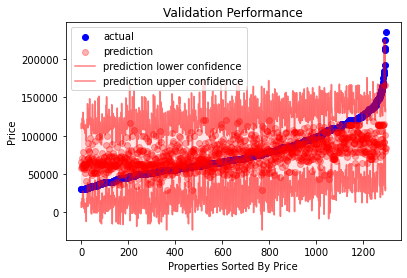

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     44.34
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.57e-99
Time:                        07:29:55   Log-Likelihood:                -15001.
No. Observations:                1295   AIC:                         3.003e+04
Df Residuals:                    1280   BIC:                         3.011e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.865e+04   4453.876     17.658      0.0

/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["lattitude"] = pois["geometry"].centroid.y #pois.apply(lambda feature: fetch_central_lattitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:583: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois["geometry"].centroid.x #pois.apply(lambda feature: fetch_central_longitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operati

fetched all features
joined data fetched
fetched pricing data
lower bound: 120000.0 
upper bound: 810000.0


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))


fetched 1664 properties for this location, check this isnt too low, if it is: prediction = N.A.


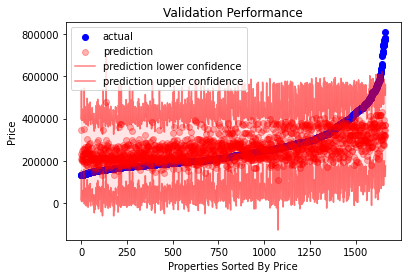

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     42.79
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          1.73e-100
Time:                        07:32:14   Log-Likelihood:                -21478.
No. Observations:                1664   AIC:                         4.299e+04
Df Residuals:                    1649   BIC:                         4.307e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.361e+05   1.67e+04     20.132      0.0

In [16]:
for location_price_data in town_dfs:
  price_df = location_price_data[0]
  town = location_price_data[1]
  town_lat = town_tests[town][0]
  town_long = town_tests[town][1]
  print(f"\n{town}:")
  prediction_ols(town_lat, town_long, "T", date, category_list, days_since=365, property_box_length=0.08, feature_box_length=0.02, training_df=None, category_pois_dict=None, perform_prediction=False)


The results are not great with this model.

Firstly, the parameter coefficients are too high meaning that the model may be overfitting to the data. This could be reduced with regularisation (L1 or L2). Additionally, you can see from the plots that the trendline of the model seems to be a very noisy linear (slightly positive gradient) line. The positive gradient is promising as it suggests that there is some correlation between at least 1 of the features and price. However, it seems like these features are not sufficient to tightly predict the property prices. The R squared metric is about 0.3 on average, this suggests that the linear model doesn't explain much of the variance.



At this point, the best change to be able to make would be to use a model which has more relevant features. This requires feature selection to decide which features should stay. One good way of doing this would be to you L1 regularisation (lasso regression). This is effective at feature selection as it penalises larger coefficients. As a result, only coefficients which are correlated will likely remain. We can then analyse what these coefficients were, what direction they were in (positive or negative), and how they varied between places. L1 regularisation is more effective than L2 regularisation (which tends to avoid sending paramerters to 0), and so will use a fully L1 weighted regulariser.

I could have also tried to use MDS by sorting the dataframe by price, removing the price values, and taking the multidimensional distance between every point with each other. However this doesn't address that I may have some features which have a large variance but no correlation with price. If this is the case, these features will make the MDS matrix very noisy and so it won't at all be trivial to figure out which features to use.

This is the same reason why PCA wouldn't work well here. PCA is all about explaining as much variance as posible. It doesn't matter if that variance is correlated or not to price. As a result, the results of PCA are unlikely to actual mean or explain anything.

## Feature Selection

### Regularisation

Inspecting the parameters, each feature seems to be about the order of magnitude of 10,000. Some are bigger so we are talking about the sum of the parameters equaling between 20% to 100% of the average values of the property prices in those areas. Therefore, I think a L1 alpha value of around 1 seems reasonable as it will still be a considerable impact on the loss of the model. 

In [59]:
# Example of regularised model prediction function
def prediction_ols_L1_regularised(pred_lattitude, pred_longitude, property_type, date, category_list, days_since=365, property_box_length=0.08, feature_box_length=0.02, training_df=None, category_pois_dict=None, perform_prediction=True, alpha=1, L1_wt=1):
  ys, xs, training_df, category_pois_dict = fynesse.address.prepare_training_data(pred_lattitude, pred_longitude, property_type, date, category_list, days_since=days_since, property_box_length=property_box_length, feature_box_length=feature_box_length, training_df=training_df, category_pois_dict=category_pois_dict)
  fit_model = fynesse.address.fit_regularised_OLS_model(ys, xs, training_df, alpha=alpha, L1_wt=L1_wt)
  print(f"Parameters for regularised model are: {fit_model.params}")
  return fit_model

In [19]:
param_results = {}
for location_price_data in town_dfs:
  price_df = location_price_data[0]
  town = location_price_data[1]
  town_lat = town_tests[town][0]
  town_long = town_tests[town][1]
  print(f"\n{town}:")
  fit_model = prediction_ols_L1_regularised(town_lat, town_long, "T", date, category_list, days_since=365, property_box_length=0.08, feature_box_length=0.02, training_df=None, category_pois_dict=None, perform_prediction=False, alpha=1, L1_wt=1)
  param_results[town] = fit_model.params


West Ham:


/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["lattitude"] = pois["geometry"].centroid.y #pois.apply(lambda feature: fetch_central_lattitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:583: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois["geometry"].centroid.x #pois.apply(lambda feature: fetch_central_longitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operati

fetched all features
joined data fetched
fetched pricing data
lower bound: 95869.6 
upper bound: 983999.9999999964


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))


Parameters for regularised model are: [ 5.01855973e+05 -1.07192027e+04  8.19039409e+06 -1.65810786e+02
  1.17711979e+07  9.71591861e+02  0.00000000e+00  2.68119430e+03
 -1.10646611e+07 -1.65304733e+03  1.84063366e+07  6.72184203e+02
  0.00000000e+00 -6.24922807e+01  0.00000000e+00]

Letchworth Garden City:


/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["lattitude"] = pois["geometry"].centroid.y #pois.apply(lambda feature: fetch_central_lattitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:583: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois["geometry"].centroid.x #pois.apply(lambda feature: fetch_central_longitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operati

fetched all features
joined data fetched
fetched pricing data
lower bound: 110125.0 
upper bound: 1296875.0


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))


Parameters for regularised model are: [ 3.51611458e+05  1.77610338e+03  5.29836273e+05 -3.20337348e+03
 -7.07041466e+06 -9.26563965e+02  9.85182604e+04  7.76823817e+03
  2.55936655e+06 -1.13887760e+04  0.00000000e+00  1.73812772e+03
 -1.83518799e+07  3.80250561e+03 -3.87231745e+06]

Ramsgate:


/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["lattitude"] = pois["geometry"].centroid.y #pois.apply(lambda feature: fetch_central_lattitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:583: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois["geometry"].centroid.x #pois.apply(lambda feature: fetch_central_longitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operati

fetched all features
joined data fetched
fetched pricing data
lower bound: 69760.0 
upper bound: 731499.9999999986


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))


Parameters for regularised model are: [ 2.49073665e+05 -2.98417114e+03  0.00000000e+00 -2.05741124e+03
  0.00000000e+00  2.47549218e+03  6.15355400e+04  1.83344388e+03
  0.00000000e+00 -4.23699297e+03  1.49195357e+06  1.58480572e+03
  0.00000000e+00 -6.16309069e+00  0.00000000e+00]

Grimsby:


/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["lattitude"] = pois["geometry"].centroid.y #pois.apply(lambda feature: fetch_central_lattitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:583: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois["geometry"].centroid.x #pois.apply(lambda feature: fetch_central_longitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operati

fetched all features
joined data fetched
fetched pricing data
lower bound: 30000.0 
upper bound: 300000.0


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))


Parameters for regularised model are: [ 6.77221820e+04 -2.55174288e+03  1.93221423e+06 -1.26815532e+02
 -1.92018179e+05  3.71621641e+03  4.43802388e+05  3.21703109e+02
  2.50069876e+04 -1.93742355e+03  0.00000000e+00  1.57271681e+03
  2.26769570e+05 -3.13994716e+02 -1.25706610e+06]

York:


/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["lattitude"] = pois["geometry"].centroid.y #pois.apply(lambda feature: fetch_central_lattitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:583: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois["geometry"].centroid.x #pois.apply(lambda feature: fetch_central_longitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operati

fetched all features
joined data fetched
fetched pricing data
lower bound: 120000.0 
upper bound: 810000.0


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))


Parameters for regularised model are: [ 2.93614046e+05  1.85549619e+03 -8.60432539e+06 -3.83357449e+03
  1.05422766e+07 -3.13394663e+03  0.00000000e+00  3.01442252e+02
  5.57810456e+06  1.30237525e+03 -3.79650174e+05  1.78924039e+03
 -4.49807041e+06  1.36276321e+01 -5.97342851e+06]


By plotting these parameters we should be able to see any correlation if it exists.

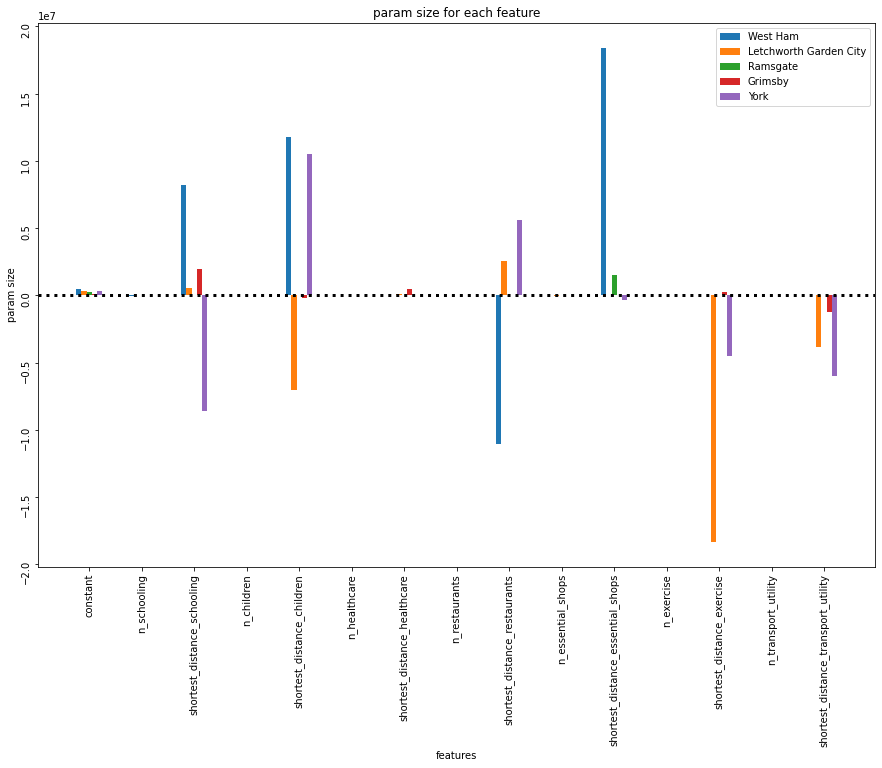

In [20]:
fig = plt.figure(figsize = (15, 10))
ti = 0
width = 0.5
r = np.arange(15)
for location_price_data in town_dfs:
  town = location_price_data[1]
  town_params = param_results[town]
  param_names = ["constant"]
  param_names += fynesse.address.feature_column_list_from_category_list(category_list)
  param_names.remove("price")
  plt.bar(r + ti * width/5 - 0.2, town_params, width=0.1, label = town)
  ti += 1

plt.axhline(y=0,linewidth= 3, color='k', linestyle= 'dotted')
plt.xticks(r, param_names)
plt.tick_params(rotation=90)
plt.xlabel("features")
plt.ylabel("param size")
plt.title("param size for each feature")
plt.legend()
plt.show()

This is very interesting and helpful. It firstly tells us that the features of the form `shortest_distance_{category}` are probably the most helpful as they were all given large values.

These parameters, they make intuitive sense in the context of property prices, which implies that they may be explainable. For example, it makes sense that the feature `shortest_distance_schooling` could have a significant impact - and the fact that it is either positive or negative could depend on the quality of the school. Being near a good school would put you in a catchment area, therefore increasing property prices - this is something real-estate agents widely state (see articles mentioned in 'Feature Visualisation and Generation')

For York, the feature was weighted negatively which was difficult to explain initially, however when looking at the area on Google Maps, the nearby schools were rated poorly ($<$3 stars for Vale of York Academy and Burton Green Primary School) which could explain this.

For a potentially better model, we could also include the quality/ratings of the schools as another feature.



Being near healthcare doesn't influence price which makes sense as you are unlikely to use the services there regularly. 


All towns agree that `shortest_distance_transport_utility` was negatively correlated, possibly due to noise, traffic and pollution, which makes sense. As they are all correlated in the same direction, this feature should be included in future models of the same style.

I would keep using this regularisation process to guide further feature selection by exploring which features have consistent and significant parameter magnitudes.

### Correlation Matrix

I can plot the correlation matrix showing how all the features in the design matrix correlate to each other and see if there are any other features correlated with price which could be used for feature seleciton.

In [46]:
training_dfs = []
for town in town_tests.keys():
  lat = town_tests[town][0]
  long = town_tests[town][1]
  training_df, category_pois_dict = fynesse.address.fetch_all_training_data(lat, long, 0.02, 0.02, 0.04, 0.04, category_list, property_type="T", date=datetime.date(2019, 1 ,1), days_since=365)
  training_dfs.append([town, training_df])

/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["lattitude"] = pois["geometry"].centroid.y #pois.apply(lambda feature: fetch_central_lattitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:583: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois["geometry"].centroid.x #pois.apply(lambda feature: fetch_central_longitude(feature["geometry"]), axis=1)
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operati

fetched all features
joined data fetched
fetched pricing data
lower bound: 89624.99999999999 
upper bound: 807224.9999999994


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' ar

fetched all features
joined data fetched
fetched pricing data
lower bound: 165223.625 
upper bound: 1694624.9999999998


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' ar

fetched all features
joined data fetched
fetched pricing data
lower bound: 64100.0 
upper bound: 540000.0


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' ar

fetched all features
joined data fetched
fetched pricing data
lower bound: 31500.0 
upper bound: 320625.0


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))
/usr/local/lib/python3.8/dist-packages/fynesse/access.py:582: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' ar

fetched all features
joined data fetched
fetched pricing data
lower bound: 115000.0 
upper bound: 1500900.0


/usr/local/lib/python3.8/dist-packages/fynesse/address.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"n_{category}"].iloc[i] = len(feature_df)
/usr/local/lib/python3.8/dist-packages/fynesse/address.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[f"shortest_distance_{category}"].iloc[i] = float(assess.calculate_closest_feature(float(training_df["lattitude"].iloc[i]), float(training_df["longitude"].iloc[i]), feature_df, feature_range_width*(2**(1/2))))


In [54]:
combined_df = training_dfs[0][1][fynesse.address.feature_column_list_from_category_list(category_list)]

for i in range(1, len(training_dfs)):
  town = training_dfs[i][0]
  training_df = training_dfs[i][1]
  cols = fynesse.address.feature_column_list_from_category_list(category_list)
  temp_df = training_df[cols]
  combined_df = pd.concat([combined_df, temp_df], ignore_index=True, sort=False)


<AxesSubplot: >

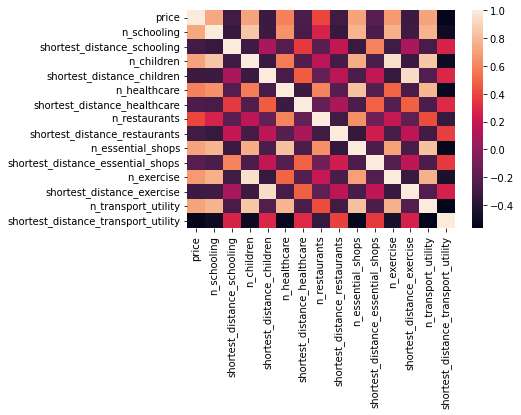

In [56]:
sns.heatmap(combined_df.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:1444: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  group.join(ax, diag_axes[0])


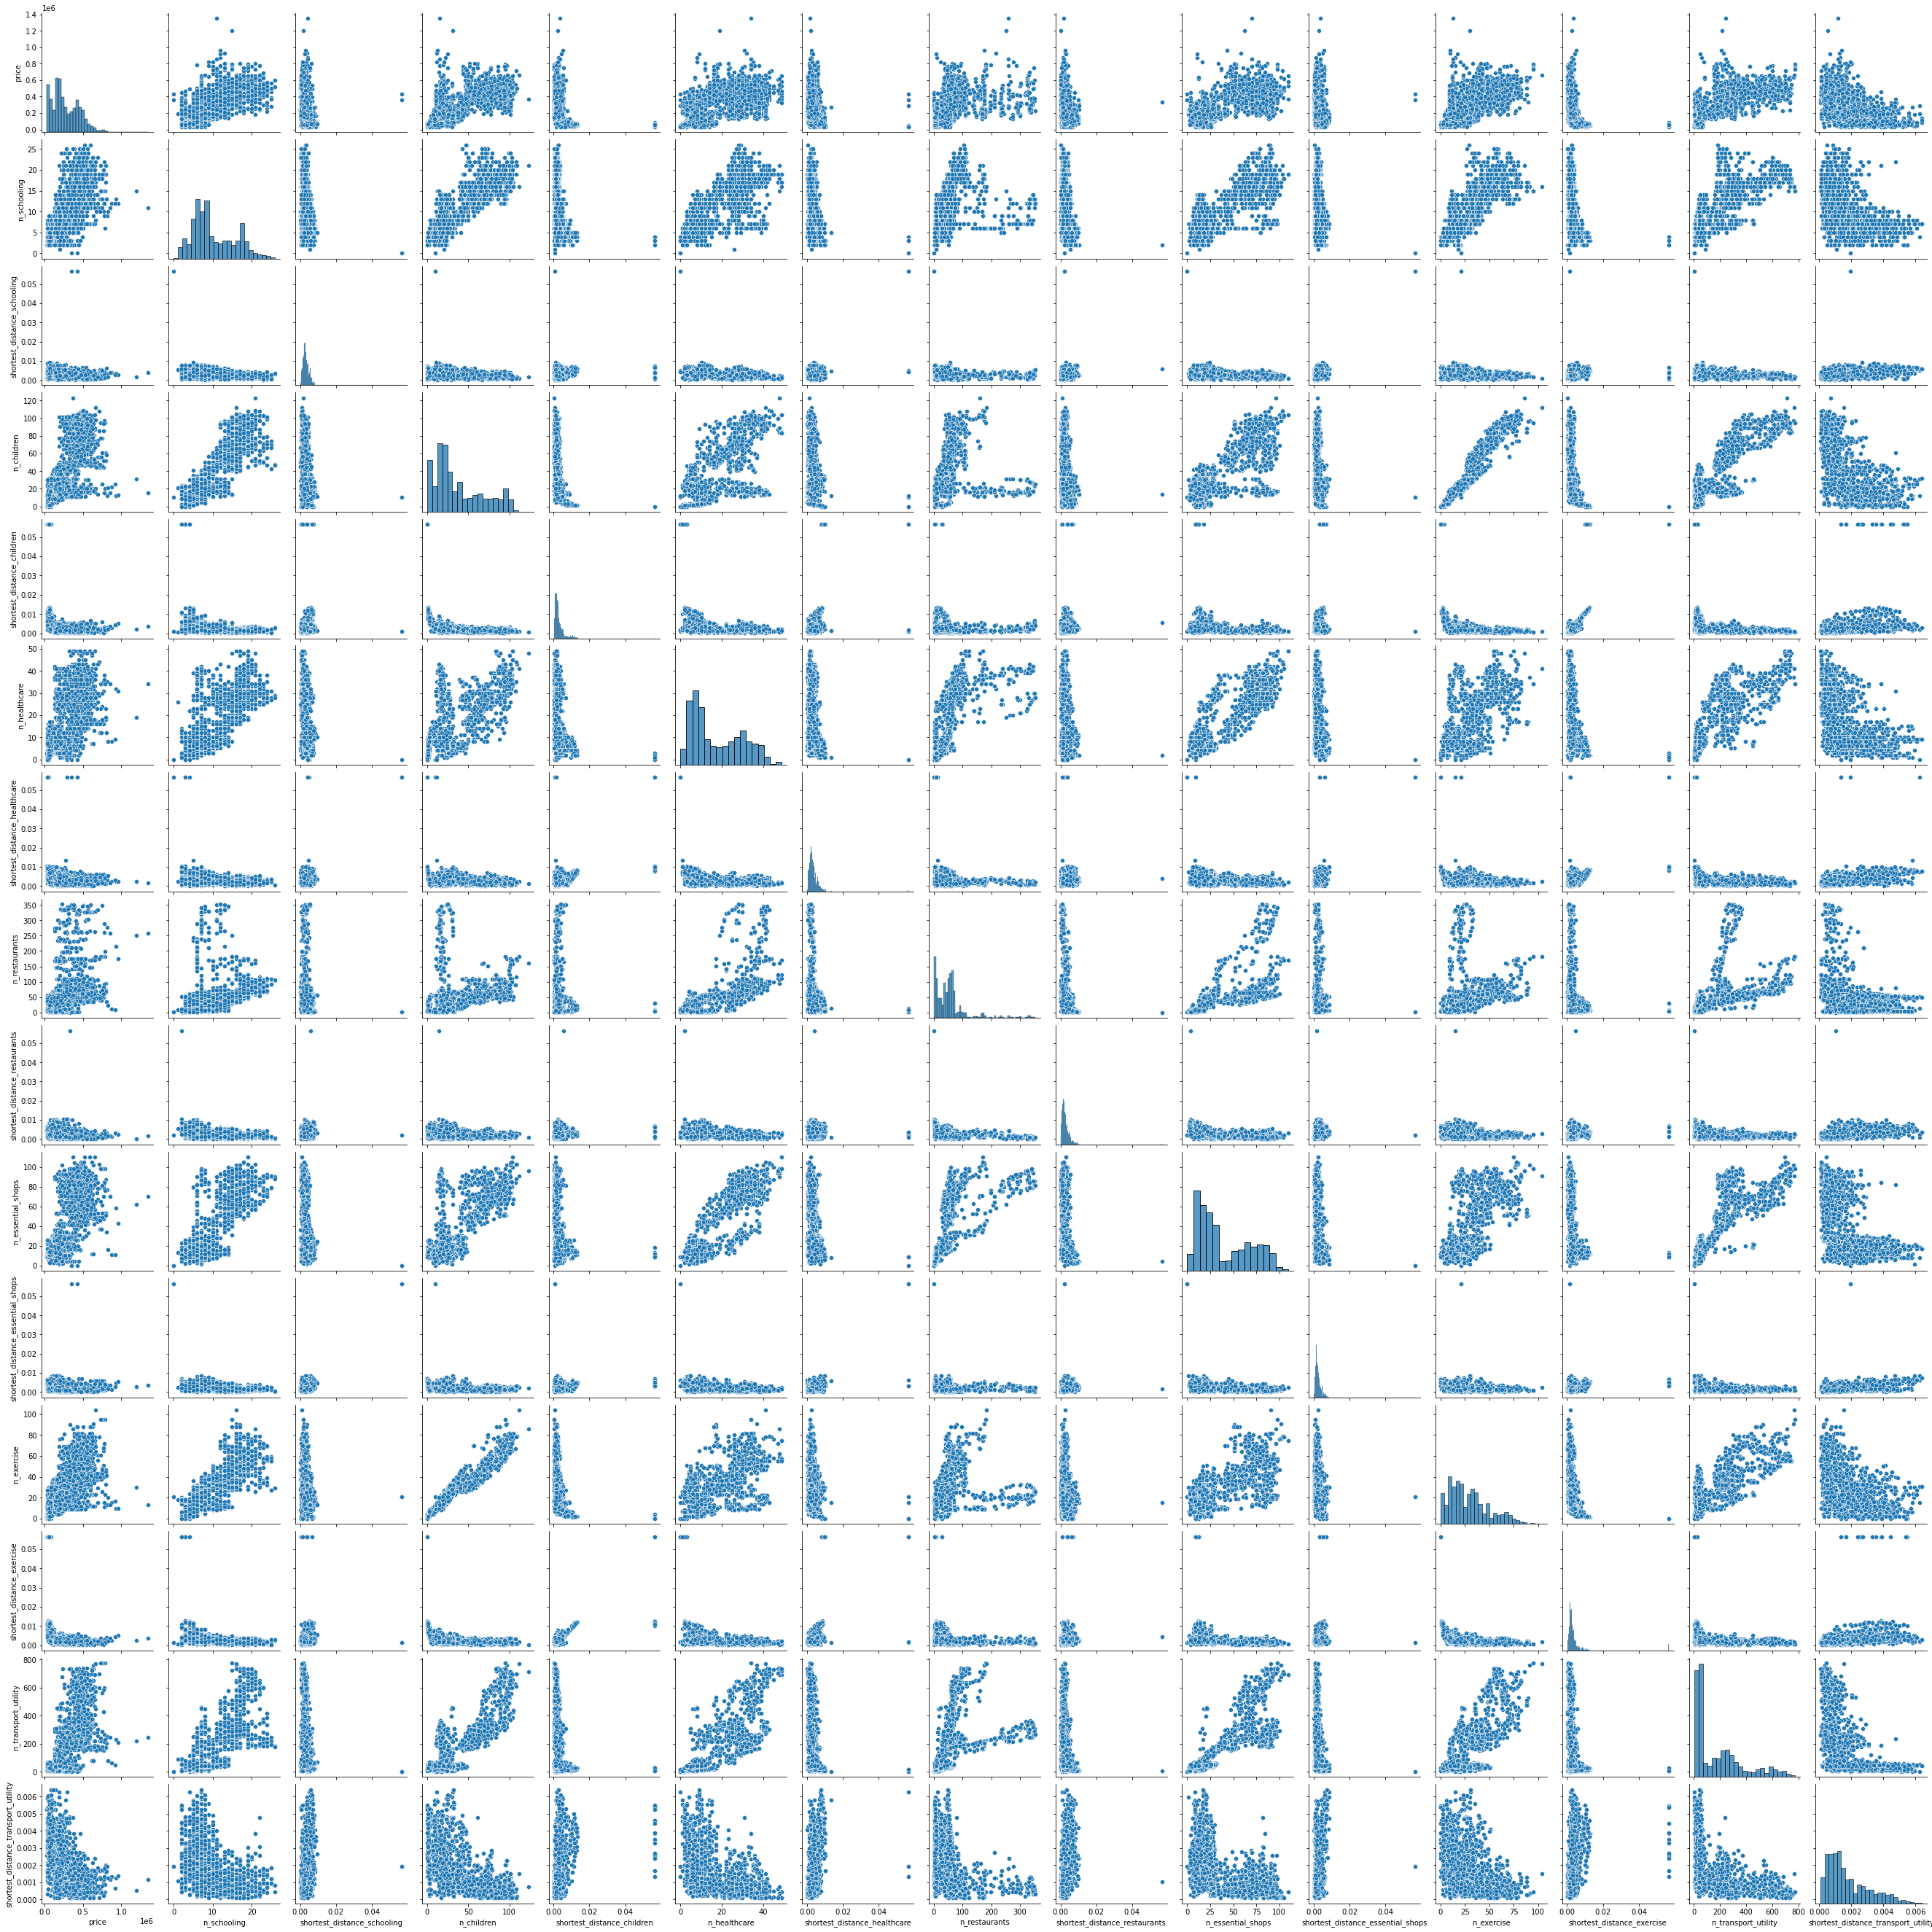

In [57]:
sns.pairplot(combined_df)

Looking at the pairplot, you can see that price seems to be positively correlated with several features such as `n_exercise`, `n_essential_shops`, `n_schooling`. None of these are surprising and match what our intuition tells us about house prices.

### Other Feature Selection Ideas

With better features selected, now would be a more appropriate time to use PCA. You could run PCA on all the relevant features and set it to 2 principle components. You could then plot these points in their transformed space and colour the datapoints with a colour map relating to their property's price. This way you might be able to visually see a model which would better fit the data.

Moreover, you could measure how much each of the eigenvectors uses each original feature vector and this could help you to determine a relationship between features which gives the property price.  

# Additional Thoughts

Predictions could be made by transposing the regularised fit parameters and dot producting them with the input feature vector.

Could do model comparison by seeing which performs best on a holdout dataset. This would be an empirical way to guide model selection. Could also use marginalisation.

Could add functionality to ensure past property data was adjusted for inflation.